In [37]:
import jax
import sjax
from sjax import nn
import numpy as np
from jax import jit, grad
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [32]:
xs = np.linspace(-10., 10., num=256)[:, None]
ys = xs**2

init, apply = sjax.transform(lambda x: nn.Sequential([nn.Linear(256, 256), nn.Sigmoid(), nn.Linear(256, 1)])(x))

In [33]:
params = init(xs)
sjax.parameter_shapes(params)

{'~/Sequential_0/__call__/Linear_0/__call__/b': (256,),
 '~/Sequential_0/__call__/Linear_0/__call__/w': (1, 256),
 '~/Sequential_0/__call__/Linear_1/__call__/b': (1,),
 '~/Sequential_0/__call__/Linear_1/__call__/w': (256, 1)}

In [34]:
def loss(params, x, y):
    return jnp.mean((apply(params, x) - y)**2)

lr = 3e-3

@jit
def update(params, x, y):
    grads = grad(loss)(params, x, y)
    return jax.tree_util.tree_map(lambda p, g: p - lr * g, params, grads)

In [35]:
for _ in range(5000):
    params = update(params, xs, ys)

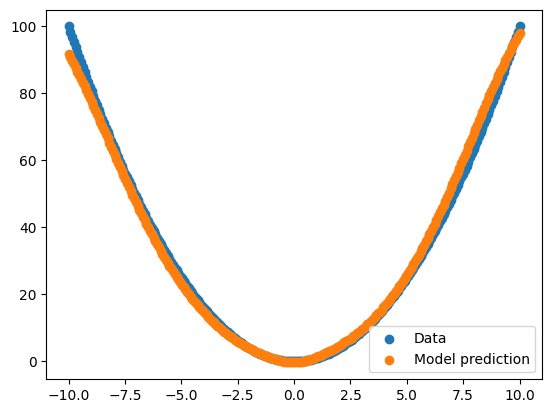

In [36]:
plt.scatter(xs, ys, label='Data')
plt.scatter(xs, apply(params, xs), label='Model prediction')
plt.legend()
plt.show()